# Preprocess

analysis of given data and store the data in numpy array format to facilitate in modeling into the model

In [39]:
import matplotlib
#matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [40]:
%matplotlib inline

In [41]:
import tensorflow as tf
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelBinarizer
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import os

In [42]:
dir="train"
classes=[clas.name for clas in os.scandir(dir) if clas.is_dir()]
print(classes)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'dio', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [43]:
# for i in classes:
#     print(os.listdir("train/"+i))
len(classes)
old=[]
data=os.listdir("train/"+"Warts Molluscum and other Viral Infections")
Warts_Molluscum_and_other_Viral_Infections={}
for i in data:
    k=i.split("-")
#     Warts_Molluscum_and_other_Viral_Infections.setdefault()
    if len(k)>1:
        k[-1]=".jpg"
    old.append(i)
    print("-".join(k[:-1]))
    
















black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel
black-heel

corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
corns
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
eczema-herpeticum
ecze

In [44]:
len(classes)
data=os.listdir("train/"+"Warts Molluscum and other Viral Infections")
Warts_Molluscum_and_other_Viral_Infections={}
for i in data:
    k=i.split("-")
#     Warts_Molluscum_and_other_Viral_Infections.setdefault()
    if len(k)>1:
        k[-1]=".jpg"
    old.append(i)
    os.rename("train/"+"Warts Molluscum and other Viral Infections/"+i,"train/"+"Warts Molluscum and other Viral Infections/"+"".join(k))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'train/Warts Molluscum and other Viral Infections/black-heel-10.jpg' -> 'train/Warts Molluscum and other Viral Infections/blackheel.jpg'

In [45]:
table={"img":[],"main":[],"sub":[]}
for i in classes:
    data=os.listdir("train/"+i)
    for j in data:
        k=j.split("-")
    #     Warts_Molluscum_and_other_Viral_Infections.setdefault()
#         if len(k)>1:
#             k[-1]=".jpg"
        table["img"].append(j)
        table["main"].append(i)
        table["sub"].append("-".join(k[:-1]))
#         print("-".join(k[:-1]))

In [46]:
classes[:]

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'dio',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [47]:
table

{'img': ['07Acne081101.jpg',
  '07AcnePittedScars.jpg',
  '07AcnePittedScars1.jpg',
  '07PerioralDermEye.jpg',
  '07PerioralDermNose.jpg',
  '07PerioralDermq.jpg',
  '07PerioralSteroid1.jpg',
  '07PerlecheAccutane.jpg',
  '07Rhinophyma1.jpg',
  '07Rhinophyma1a.jpg',
  '07Rhinophymaq.jpg',
  '07rhnophymas032105.jpg',
  '07rhnophymas0321051.jpg',
  '07rosacea010206OK.jpg',
  '07RosaceaForehead.jpg',
  '07RosaceaFulFAce.jpg',
  '07RosaceaK0216.jpg',
  '07RosaceaK02161.jpg',
  '07RosaceaK02162.jpg',
  '07RosaceaK02163.jpg',
  '07RosaceaK02164.jpg',
  '07RosaceaK02165.jpg',
  '07RosaceaK02166.jpg',
  '07RosaceaMilia0120.jpg',
  '07RosaceaOK082806.jpg',
  '07RosaceaOK0828062.jpg',
  '07RosaceaOK0828063.jpg',
  '07RosaceaTel011204.jpg',
  '07rosaceaTreated091806OK.jpg',
  '07sebDerem110105.jpg',
  '07sebDerem1101051.jpg',
  '07sebDerem1101052.jpg',
  '07SteroidPerioral.jpg',
  '07SteroidRosacea.jpg',
  '07SteroidRosacea43.jpg',
  '07SteroidRosGlab.jpg',
  '07VascularFace0120.jpg',
  '08Perior

In [48]:
import pandas as pd
df=pd.DataFrame(table)
print(df)
df.to_csv("data"+".csv",index=False)

                          img                                        main  \
0            07Acne081101.jpg                     Acne and Rosacea Photos   
1       07AcnePittedScars.jpg                     Acne and Rosacea Photos   
2      07AcnePittedScars1.jpg                     Acne and Rosacea Photos   
3       07PerioralDermEye.jpg                     Acne and Rosacea Photos   
4      07PerioralDermNose.jpg                     Acne and Rosacea Photos   
...                       ...                                         ...   
15552    warts-plantar-97.jpg  Warts Molluscum and other Viral Infections   
15553    warts-plantar-98.jpg  Warts Molluscum and other Viral Infections   
15554    warts-plantar-99.jpg  Warts Molluscum and other Viral Infections   
15555   warts-treatment-1.jpg  Warts Molluscum and other Viral Infections   
15556   warts-treatment-3.jpg  Warts Molluscum and other Viral Infections   

                   sub  
0                       
1                       


Data has been sorted out

In [49]:
sorted_data=pd.read_csv("data.csv")

In [50]:
sorted_data.head()

,img,main,sub
0,07Acne081101.jpg,Acne and Rosacea Photos,NaN
1,07AcnePittedScars.jpg,Acne and Rosacea Photos,NaN
2,07AcnePittedScars1.jpg,Acne and Rosacea Photos,NaN
3,07PerioralDermEye.jpg,Acne and Rosacea Photos,NaN
4,07PerioralDermNose.jpg,Acne and Rosacea Photos,NaN


In [51]:
x,y=[],[]
for clas in classes:
    path=os.path.join(dir,clas)
    for img in os.listdir(path):
        k=cv2.imread(os.path.join(path,img))
        k=cv2.cvtColor(k, cv2.COLOR_BGR2RGB)
        k=cv2.resize(k, (224, 224))
        x.append(k)
        y.append(str(clas))

In [52]:
for i in range(len(table["img"])):
    table["img"][i]="train/"+table["main"][i]+"/"+table["img"][i]
#     ="train/"
# k=cv2.imread("train/"+table["main"][0]+"/"+table["img"][0])
# imshow(k)

In [53]:
x,y=[],[]
for i in range(len(table["img"])):
    k=cv2.imread(table["img"][i])
    k=cv2.cvtColor(k, cv2.COLOR_BGR2RGB)
    k=cv2.resize(k, (224, 224))
    x.append(k)
    y.append(str(table["main"][i]))

In [54]:
extracted_data={"img":x,"Label":y}

In [55]:
pd.DataFrame(extracted_data).to_csv("num_img.csv",index=False)

In [56]:
x=np.array(x)
y=np.array(y)

In [63]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [61]:
# imshow(x[0])
lb = LabelBinarizer()
y= lb.fit_transform(y)
print(y[11110])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [58]:
(trainX, testX, trainY, testY) = train_test_split(x, y,
test_size=0.20, stratify=y, random_state=42)

In [59]:
trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
valAug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [60]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [65]:
baseModel=MobileNetV2(include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [52]:
pred=model.predict(x[0].reshape(1,224,224,3))

In [56]:
from tensorflow.keras.applications import imagenet_utils
imagenet_utils.decode_predictions(pred)

[[('n04209239', 'shower_curtain', 0.50954825),
  ('n04589890', 'window_screen', 0.1030229),
  ('n03347037', 'fire_screen', 0.07872436),
  ('n04507155', 'umbrella', 0.01933838),
  ('n04286575', 'spotlight', 0.017734211)]]

In [65]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [66]:
for layer in baseModel.layers:
	layer.trainable = False


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

In [68]:
print("[INFO] compiling model...")
opt = SGD(learning_rate=1e-4, momentum=0.9, decay=1e-4 / 25)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 32,
	epochs=25)

[INFO] compiling model...
[INFO] training head...


C:\Users\Captain\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
388/388 [==============================] - 541s 1s/step - loss: 3.2602 - accuracy: 0.0789 - val_loss: 2.9500 - val_accuracy: 0.1118
Epoch 2/25
388/388 [==============================] - 517s 1s/step - loss: 3.0224 - accuracy: 0.1041 - val_loss: 2.9117 - val_accuracy: 0.1269
Epoch 3/25
301/388 [======================>.......] - ETA: 1:43 - loss: 2.9594 - accuracy: 0.1153

KeyboardInterrupt: 

In [8]:
import pandas as pd
data=pd.read_csv("num_img.csv")
im=data["img"][0]

In [11]:
import numpy as np
im=np.array(im)

In [14]:
im

array('[[[155 121 112]\n  [161 126 120]\n  [162 127 123]\n  ...\n  [160 119 113]\n  [156 117 110]\n  [160 121 114]]\n\n [[161 127 118]\n  [164 129 123]\n  [162 127 123]\n  ...\n  [143 104  97]\n  [158 119 112]\n  [158 121 115]]\n\n [[160 125 117]\n  [161 126 120]\n  [162 126 123]\n  ...\n  [159 120 114]\n  [162 124 119]\n  [155 117 114]]\n\n ...\n\n [[156 119 110]\n  [153 118 112]\n  [158 124 121]\n  ...\n  [ 11   7   4]\n  [ 11   7   4]\n  [  9   8   4]]\n\n [[150 112 103]\n  [151 117 111]\n  [157 123 120]\n  ...\n  [ 11   7   4]\n  [ 11   7   4]\n  [  9   8   4]]\n\n [[163 124 118]\n  [153 118 114]\n  [158 124 122]\n  ...\n  [ 11   8   5]\n  [  9   8   4]\n  [  9   8   4]]]',
      dtype='<U629')

In [72]:
num_data={"labels":np.array(y)}

In [73]:
df=pd.DataFrame(num_data)
df.to_csv(labels)

ValueError: If using all scalar values, you must pass an index

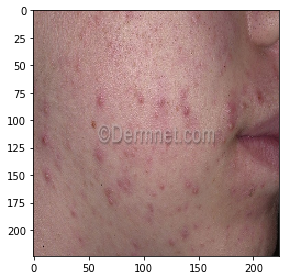

In [75]:
imshow(x[0])

In [78]:
print(x[0])

[[[155 121 112]
  [161 126 120]
  [162 127 123]
  ...
  [160 119 113]
  [156 117 110]
  [160 121 114]]

 [[161 127 118]
  [164 129 123]
  [162 127 123]
  ...
  [143 104  97]
  [158 119 112]
  [158 121 115]]

 [[160 125 117]
  [161 126 120]
  [162 126 123]
  ...
  [159 120 114]
  [162 124 119]
  [155 117 114]]

 ...

 [[156 119 110]
  [153 118 112]
  [158 124 121]
  ...
  [ 11   7   4]
  [ 11   7   4]
  [  9   8   4]]

 [[150 112 103]
  [151 117 111]
  [157 123 120]
  ...
  [ 11   7   4]
  [ 11   7   4]
  [  9   8   4]]

 [[163 124 118]
  [153 118 114]
  [158 124 122]
  ...
  [ 11   8   5]
  [  9   8   4]
  [  9   8   4]]]


In [79]:
np.savetxt('data.csv', x, delimiter=',')

ValueError: Expected 1D or 2D array, got 4D array instead

In [81]:
x.shape

(15557, 224, 224, 3)

In [82]:
y.shape

(15557, 23)

In [83]:
224*224*3

150528

In [ ]:
x.reshape()

In [85]:
# np.save('data.csv', x)

In [ ]:
xx=np.load("data.csv.npy")

In [88]:
np.save("labels",y)

In [87]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)